In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
USA_Housing = pd.read_csv('data/USA_Housing.csv')
USA_Housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


Queremos predecir los precios de una serie de casas, a partir de las siguientes variables:

- Avg. Area Income: Renta media de los residentes de la ciudad donde está la casa
- Avg. Area House Age: media de antigüedad de las casas de esa ciudad
- Avg. Area Number of Rooms: Número medio de habitaciones en las casas de esa ciudad
- Avg Area Number of Bedrooms: Número medio de dormitorios en las casas de la ciudad
- Area Population: Población de la ciudad
- Price: Precio de la casa (variable objetivo)
- Address: Dirección

In [3]:
USA_Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
USA_Housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## Exploratory Data Analysis

Vamos a explorar la relación entre las variables

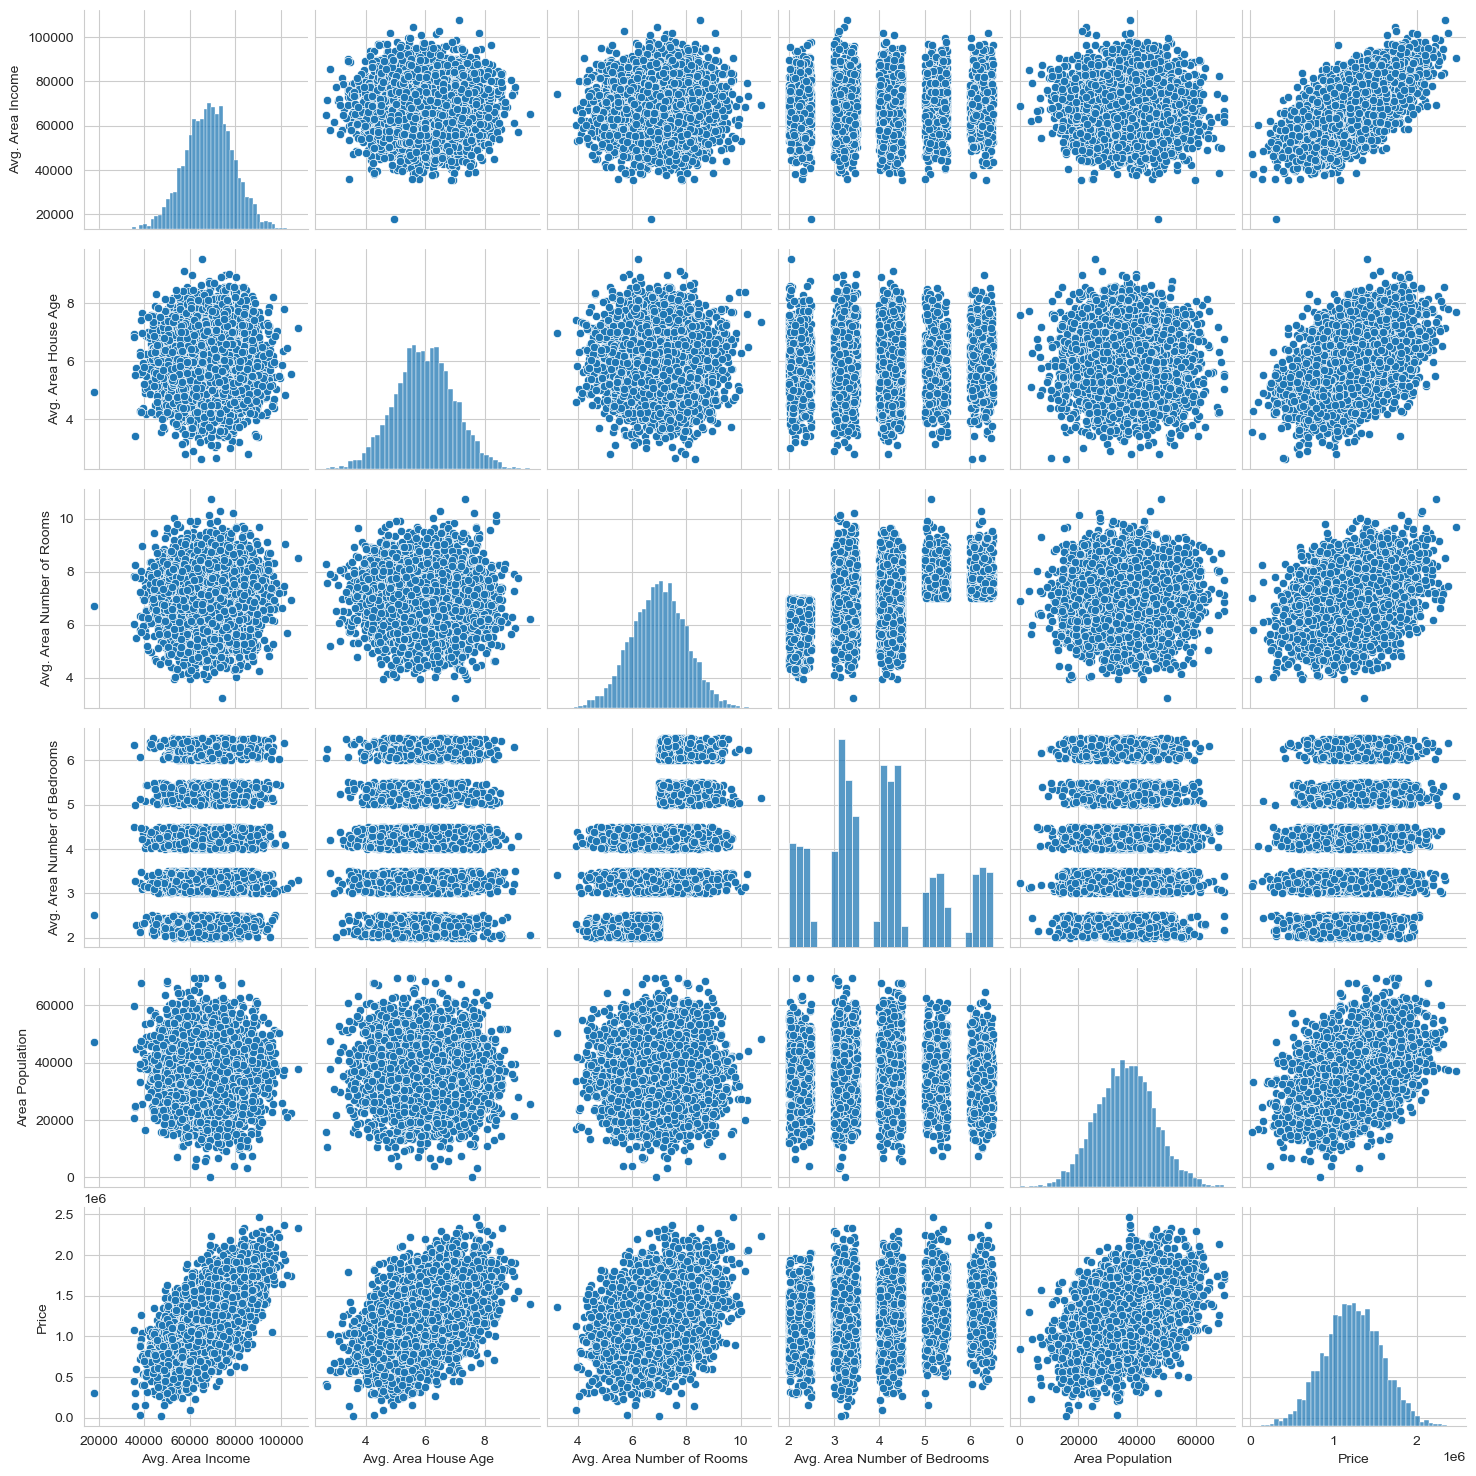

In [5]:
sns.pairplot(USA_Housing);

Distribución del precio

C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


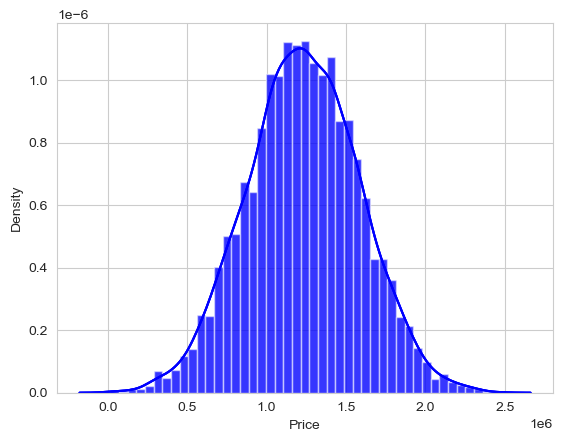

In [8]:
sns.distplot(USA_Housing['Price'], color='Blue')
plt.show()

In [10]:
USA_Housing.corr()

C:\Users\Rafa\AppData\Local\Temp\ipykernel_2576\3957675040.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  USA_Housing.corr()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


C:\Users\Rafa\AppData\Local\Temp\ipykernel_2576\977727899.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(USA_Housing.corr(),annot=True);


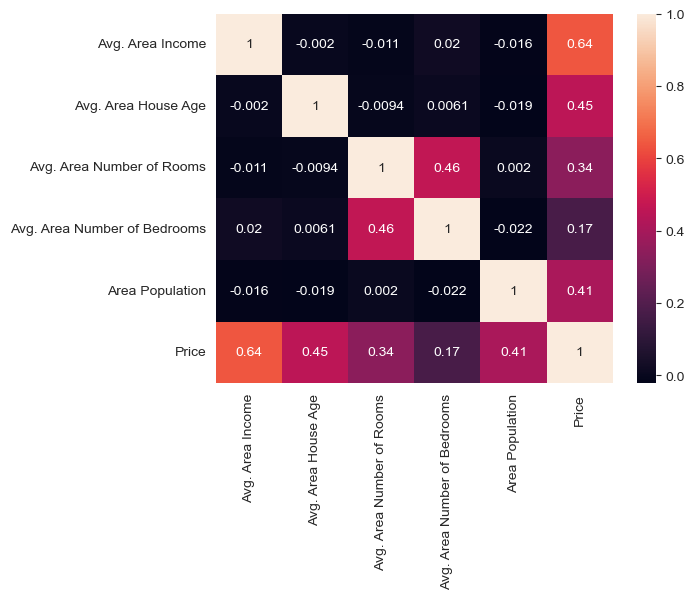

In [11]:
sns.heatmap(USA_Housing.corr(),annot=True);
plt.show();

## Entrenar un modelo de Regresión Lineal

En primer lugar, dividimos en train y test

In [12]:
USA_Housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [13]:
# Feautures
X = USA_Housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

# Target
y = USA_Housing['Price']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 5)
(4000, 5)
(1000, 5)
(4000,)
(1000,)


In [23]:
from sklearn.linear_model import LinearRegression

# Creamos un objeto
lm = LinearRegression()

In [24]:
# Entrenamos con los datos de train
lm.fit(X_train, y_train)

LinearRegression()

Analizamos los coeficientes  
$y = w_0 + w_1x_1 + w_2x_2 + ...$

In [25]:
lm.intercept_

-2635072.900931212

In [26]:
lm.coef_

array([2.16522058e+01, 1.64666481e+05, 1.19624012e+05, 2.44037761e+03,
       1.52703134e+01])

In [27]:
coef_df = pd.DataFrame(lm.coef_, X.columns, 
                      columns=['Coefficient'])
coef_df

,Coefficient
Avg. Area Income,21.652206
Avg. Area House Age,164666.480722
Avg. Area Number of Rooms,119624.012232
Avg. Area Number of Bedrooms,2440.377611
Area Population,15.270313


Interpretación de los coeficientes

Manteniendo fijos el resto de coeficientes:
- Un incremento de 1 unidad en **Avg. Area Income** equivale a un incremento de **21.64 dólares**  
- Un incremento de 1 unidad en **Avg. Area House Age** equivale a un incremento de **164,666 dólares**
- Un incremento de 1 unidad en **Avg. Area Number of Rooms** equivale a un incremento de **119,624 dólares**
- Un incremento de 1 unidad en **Avg. Area Number of Bedrooms** equivale a un incremento de **2,440  dólares**
- Un incremento de 1 unidad en **Area Population** equivale a un incremento de **15.27 dólares**

$Precio = 	21.652206 \times \text{Avg. Area Income}+ 
164666.480722 \times \text{Avg. Area House Age} + 
119624.012232  \times \text{Avg. Area Number of Rooms}	+
2440.377611 \times \text{Avg. Area Number of Bedrooms}	+
15.270313 \times \text{Area Population}$

## Predicciones de nuestro modelo

In [28]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1501,61907.593345,7.017838,6.440256,3.25,43828.947207
2586,57160.202243,6.893260,6.921532,3.13,43467.147035
2653,70190.796445,6.745054,6.662567,2.01,29215.136112
1055,69316.796889,6.300409,7.873576,4.28,24448.211461
705,72991.481649,3.412866,6.494081,2.48,50626.495426
...,...,...,...,...,...
4711,77267.656264,3.939501,8.342808,6.09,22487.712072
2313,75967.135085,5.939370,6.111658,2.32,38897.091584
3214,81013.615294,7.149797,7.239105,5.44,45472.049451
2732,86762.882864,6.530193,5.106962,2.09,47724.581355


In [30]:
new_home = np.array([[100000, 20, 8, 8, 100000]])
lm.predict(new_home)

C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5327023.75160436])

In [29]:
predictions = lm.predict(X_test)
predictions

array([1308587.92699714, 1237037.22949391, 1243429.34030722,
       1228900.21360437, 1063320.90710747, 1544058.05034817,
       1094774.70493034,  833284.72339248,  788412.85578756,
       1469714.86615696,  671728.43662092, 1606818.21977767,
       1004166.61331045, 1796798.97595973, 1288566.96220949,
       1087782.93301086, 1423072.3749249 , 1078178.68169646,
        802286.03537917,  930761.03695739, 1134829.86477803,
        916398.42023083, 1489972.69335353, 1284580.15538841,
       1582071.35322685, 1132519.15992002, 1089888.39644489,
        974510.51872177,  924057.96820804, 1740759.72092213,
       1286481.59512379, 1621289.95171618, 1435264.20161695,
       1234014.77924529, 1485434.5730037 , 1718335.00753592,
       1538953.74882758,  777106.64791831, 1765201.52243597,
       1175972.14199831, 1553707.94323478,  897703.67505165,
       1371049.803266  ,  845281.72310351, 1201022.89803856,
       1133285.98450789, 1363128.14557396, 1449814.0876822 ,
       1574363.90467323,

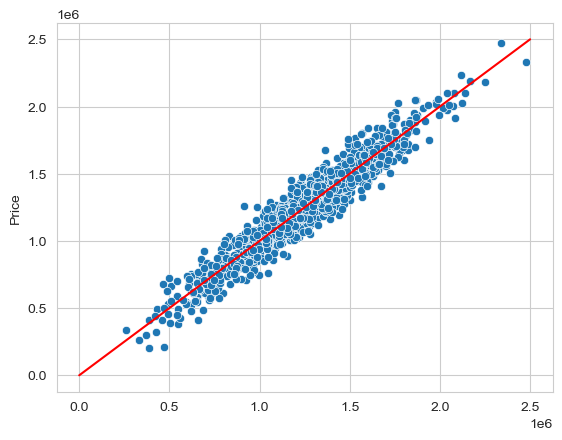

In [41]:
sns.scatterplot(x=predictions,y=y_test);
plt.plot([0,2.5e6],[0,2.5e6],'red')
plt.show()

### Histograma de residuos

Pintar un histograma de los residuos y asegurarnos de que siguen una distribución normal. Si no es así, la regresión lineal no es apropiada para este análisis.

C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


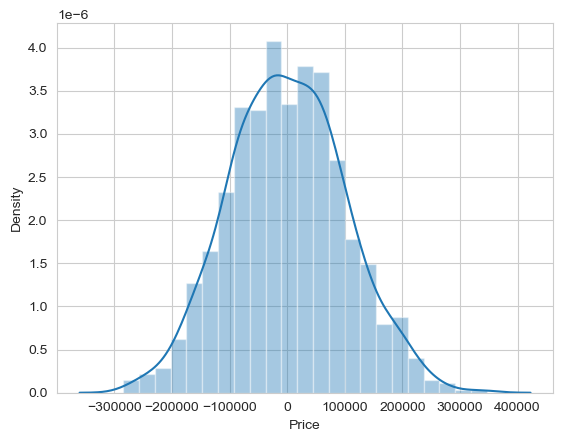

In [43]:
sns.distplot((y_test - predictions));
plt.show()

### Métricas de error

- **MAE** (Mean Absolute Error): es el error medio (la más fácil de entender)
- **MSE** (Mean Squared Error): es más popular que el MAE ya que penaliza errores grandes
- **RMSE** (Root Mean Squared Error): es todavía más popular que el MSE porque está en las mismas unidades que la variable objetivo $y$
- **$R^2$** (Coeficiente de determinación): proporción de la varianza total de la variable objetivo explicada por la regresión

In [44]:
from sklearn import metrics

In [53]:
pred_train = lm.predict(X_train)
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('MSE train', metrics.mean_squared_error(y_train, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('R2 train', lm.score(X_train,y_train))

MAE train 81509.39331244805
MSE train 10256318867.482723
RMSE train 101273.48551068401
R2 train 0.9179787435623722


In [54]:
print('MAE test', metrics.mean_absolute_error(y_test, predictions))
print('MSE test', metrics.mean_squared_error(y_test, predictions))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 test', lm.score(X_test,y_test))

MAE test 80879.09723486962
MSE test 10089009300.890661
RMSE test 100444.06055556824
R2 test 0.9179971706834602


## Importancia de variables 

In [56]:
coef_df.sort_values('Coefficient', ascending=False)

,Coefficient
Avg. Area House Age,164666.480722
Avg. Area Number of Rooms,119624.012232
Avg. Area Number of Bedrooms,2440.377611
Avg. Area Income,21.652206
Area Population,15.270313


Una habitación extra incrementa el precio (y) en 2440 dólares, y un dolar extra en area income 
incrementa el precio en 21 dólares. Esto es el significado de los coeficientes, pero no quiere decir
que el número de habitaciones sea más importante/relevante que el area income  

Para conocer la importancia de variables tenemos que **estandarizar** los datos antes de entrenar el modelo

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

# X_train_scaled = scaler.fit_transform(X_train)

In [61]:
X_train_scaled

array([[-0.19049241, -0.12817719, -0.13160635,  0.12038585, -0.82761782],
       [-1.38876401,  0.43080443,  0.80028487, -0.55648895,  1.15829878],
       [-0.35012392,  0.46680752,  1.70375078,  0.03067955, -0.31904298],
       ...,
       [-0.22335061,  0.53809182, -0.36489661, -0.68697084,  0.11908894],
       [-0.92417067,  1.43077434,  2.26846315,  0.2753331 ,  1.39018355],
       [-0.69357335, -0.07762332,  0.89219611,  1.67801341, -0.00681852]])

In [62]:
lm_scaled = LinearRegression()
lm_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [63]:
feat_coef = pd.DataFrame(lm_scaled.coef_,
                        X_train.columns, 
                        columns=['importance_standarized']).sort_values('importance_standarized',
                                                                       ascending=False)
feat_coef

,importance_standarized
Avg. Area Income,231741.876652
Avg. Area House Age,163580.776566
Area Population,152235.900097
Avg. Area Number of Rooms,120724.771387
Avg. Area Number of Bedrooms,2992.449135


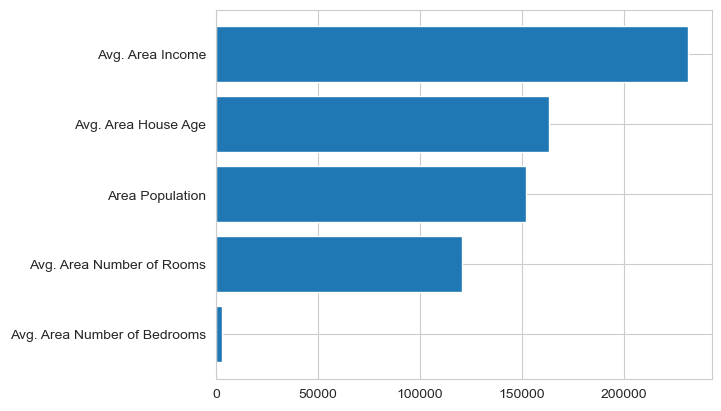

In [67]:
features = feat_coef.sort_values('importance_standarized')
plt.barh(features.index,features.importance_standarized)
plt.show()

## Eliminar variables poco importantes

In [68]:
USA_Housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [75]:
X_train.drop(columns='Avg. Area Number of Bedrooms',inplace=True)
X_test.drop(columns='Avg. Area Number of Bedrooms',inplace=True)

lm2 = LinearRegression()
lm2.fit(X_train,y_train)

pred2 = lm2.predict(X_test)

print('MAE test', metrics.mean_absolute_error(y_test, pred2))
print('MSE test', metrics.mean_squared_error(y_test, pred2))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, pred2)))
print('R2 test', lm2.score(X_test,y_test))

MAE test 80857.78944046414
MSE test 10073721633.87275
RMSE test 100367.93130214824
R2 test 0.9181214278738077
